<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Data-insights" data-toc-modified-id="Data-insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data insights</a></span></li><li><span><a href="#Baseline---CNN" data-toc-modified-id="Baseline---CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline - CNN</a></span></li></ul></div>

# Preprocessing 

In [1]:
import pandas as pd
import csv
from PIL import Image
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader, TensorDataset, Subset, random_split
import copy
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score

E:\anaconda\envs\CS5242\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'E:\anaconda\envs\CS5242\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


The labelResultAll.txt contains the label sentiment of both the image and the text. First we transform this into a structured csv data file.

In [2]:
with open('./MVSA_Single/labelResultAll.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

data = []
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) != 2:
        continue 
    col1 = parts[0]
    rest = parts[1].split(',') 
    row = [col1] + rest
    data.append(row)

with open('label.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(data)

Since the image is in different size, and we need structured data to train the model in both CNN and multimodel, we transformed all image to the size of 224 x 224, which is the size of what most image classification and processing models use as input image sizes.

In [4]:
input_folder = './MVSA_Single/data'
output_folder = './image'
target_size = (224, 224)

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') and filename.split('.')[0].isdigit():
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        try:
            img = Image.open(input_path).convert('RGB')
            img_resized = img.resize(target_size)
            img_resized.save(output_path)
            print(f"Saved resized image: {output_path}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

Saved resized image: ./image\1.jpg
Saved resized image: ./image\10.jpg
Saved resized image: ./image\100.jpg
Saved resized image: ./image\1000.jpg
Saved resized image: ./image\1001.jpg
Saved resized image: ./image\1002.jpg
Saved resized image: ./image\1003.jpg
Saved resized image: ./image\1004.jpg
Saved resized image: ./image\1005.jpg
Saved resized image: ./image\1006.jpg
Saved resized image: ./image\1007.jpg
Saved resized image: ./image\1008.jpg
Saved resized image: ./image\1009.jpg
Saved resized image: ./image\101.jpg
Saved resized image: ./image\1010.jpg
Saved resized image: ./image\1011.jpg
Saved resized image: ./image\1012.jpg
Saved resized image: ./image\1013.jpg
Saved resized image: ./image\1014.jpg
Saved resized image: ./image\1015.jpg
Saved resized image: ./image\1016.jpg
Saved resized image: ./image\1017.jpg
Saved resized image: ./image\1018.jpg
Saved resized image: ./image\1019.jpg
Saved resized image: ./image\102.jpg
Saved resized image: ./image\1020.jpg
Saved resized image:

Saved resized image: ./image\1203.jpg
Saved resized image: ./image\1204.jpg
Saved resized image: ./image\1205.jpg
Saved resized image: ./image\1206.jpg
Saved resized image: ./image\1207.jpg
Saved resized image: ./image\1208.jpg
Saved resized image: ./image\1209.jpg
Saved resized image: ./image\121.jpg
Saved resized image: ./image\1210.jpg
Saved resized image: ./image\1211.jpg
Saved resized image: ./image\1212.jpg
Saved resized image: ./image\1213.jpg
Saved resized image: ./image\1214.jpg
Saved resized image: ./image\1215.jpg
Saved resized image: ./image\1216.jpg
Saved resized image: ./image\1217.jpg
Saved resized image: ./image\1218.jpg
Saved resized image: ./image\1219.jpg
Saved resized image: ./image\122.jpg
Saved resized image: ./image\1220.jpg
Saved resized image: ./image\1221.jpg
Saved resized image: ./image\1222.jpg
Saved resized image: ./image\1223.jpg
Saved resized image: ./image\1224.jpg
Saved resized image: ./image\1225.jpg
Saved resized image: ./image\1226.jpg
Saved resized 

Saved resized image: ./image\1422.jpg
Saved resized image: ./image\1423.jpg
Saved resized image: ./image\1424.jpg
Saved resized image: ./image\1425.jpg
Saved resized image: ./image\1426.jpg
Saved resized image: ./image\1427.jpg
Saved resized image: ./image\1428.jpg
Saved resized image: ./image\1429.jpg
Saved resized image: ./image\143.jpg
Saved resized image: ./image\1430.jpg
Saved resized image: ./image\1431.jpg
Saved resized image: ./image\1432.jpg
Saved resized image: ./image\1433.jpg
Saved resized image: ./image\1434.jpg
Saved resized image: ./image\1435.jpg
Saved resized image: ./image\1436.jpg
Saved resized image: ./image\1437.jpg
Saved resized image: ./image\1438.jpg
Saved resized image: ./image\1439.jpg
Saved resized image: ./image\144.jpg
Saved resized image: ./image\1440.jpg
Saved resized image: ./image\1441.jpg
Saved resized image: ./image\1442.jpg
Saved resized image: ./image\1443.jpg
Saved resized image: ./image\1444.jpg
Saved resized image: ./image\1445.jpg
Saved resized 

Saved resized image: ./image\1633.jpg
Saved resized image: ./image\1634.jpg
Saved resized image: ./image\1635.jpg
Saved resized image: ./image\1636.jpg
Saved resized image: ./image\1637.jpg
Saved resized image: ./image\1638.jpg
Saved resized image: ./image\1639.jpg
Saved resized image: ./image\164.jpg
Saved resized image: ./image\1640.jpg
Saved resized image: ./image\1641.jpg
Saved resized image: ./image\1642.jpg
Saved resized image: ./image\1643.jpg
Saved resized image: ./image\1644.jpg
Saved resized image: ./image\1645.jpg
Saved resized image: ./image\1646.jpg
Saved resized image: ./image\1647.jpg
Saved resized image: ./image\1648.jpg
Saved resized image: ./image\1649.jpg
Saved resized image: ./image\165.jpg
Saved resized image: ./image\1650.jpg
Saved resized image: ./image\1651.jpg
Saved resized image: ./image\1652.jpg
Saved resized image: ./image\1653.jpg
Saved resized image: ./image\1654.jpg
Saved resized image: ./image\1655.jpg
Saved resized image: ./image\1656.jpg
Saved resized 

Saved resized image: ./image\183.jpg
Saved resized image: ./image\1830.jpg
Saved resized image: ./image\1831.jpg
Saved resized image: ./image\1832.jpg
Saved resized image: ./image\1833.jpg
Saved resized image: ./image\1834.jpg
Saved resized image: ./image\1835.jpg
Saved resized image: ./image\1836.jpg
Saved resized image: ./image\1837.jpg
Saved resized image: ./image\1838.jpg
Saved resized image: ./image\1839.jpg
Saved resized image: ./image\184.jpg
Saved resized image: ./image\1840.jpg
Saved resized image: ./image\1841.jpg
Saved resized image: ./image\1842.jpg
Saved resized image: ./image\1843.jpg
Saved resized image: ./image\1844.jpg
Saved resized image: ./image\1845.jpg
Saved resized image: ./image\1846.jpg
Saved resized image: ./image\1847.jpg
Saved resized image: ./image\1848.jpg
Saved resized image: ./image\1849.jpg
Saved resized image: ./image\185.jpg
Saved resized image: ./image\1850.jpg
Saved resized image: ./image\1851.jpg
Saved resized image: ./image\1852.jpg
Saved resized i

Saved resized image: ./image\2027.jpg
Saved resized image: ./image\2028.jpg
Saved resized image: ./image\2029.jpg
Saved resized image: ./image\203.jpg
Saved resized image: ./image\2030.jpg
Saved resized image: ./image\2031.jpg
Saved resized image: ./image\2032.jpg
Saved resized image: ./image\2033.jpg
Saved resized image: ./image\2034.jpg
Saved resized image: ./image\2035.jpg
Saved resized image: ./image\2036.jpg
Saved resized image: ./image\2037.jpg
Saved resized image: ./image\2038.jpg
Saved resized image: ./image\2039.jpg
Saved resized image: ./image\204.jpg
Saved resized image: ./image\2040.jpg
Saved resized image: ./image\2041.jpg
Saved resized image: ./image\2042.jpg
Saved resized image: ./image\2043.jpg
Saved resized image: ./image\2044.jpg
Saved resized image: ./image\2045.jpg
Saved resized image: ./image\2046.jpg
Saved resized image: ./image\2047.jpg
Saved resized image: ./image\2048.jpg
Saved resized image: ./image\2049.jpg
Saved resized image: ./image\205.jpg
Saved resized i

Saved resized image: ./image\2369.jpg
Saved resized image: ./image\237.jpg
Saved resized image: ./image\2370.jpg
Saved resized image: ./image\2371.jpg
Saved resized image: ./image\2372.jpg
Saved resized image: ./image\2373.jpg
Saved resized image: ./image\2374.jpg
Saved resized image: ./image\2375.jpg
Saved resized image: ./image\2376.jpg
Saved resized image: ./image\2377.jpg
Saved resized image: ./image\2378.jpg
Saved resized image: ./image\2379.jpg
Saved resized image: ./image\238.jpg
Saved resized image: ./image\2380.jpg
Saved resized image: ./image\2381.jpg
Saved resized image: ./image\2382.jpg
Saved resized image: ./image\2383.jpg
Saved resized image: ./image\2384.jpg
Saved resized image: ./image\2385.jpg
Saved resized image: ./image\2386.jpg
Saved resized image: ./image\2387.jpg
Saved resized image: ./image\2388.jpg
Saved resized image: ./image\2389.jpg
Saved resized image: ./image\239.jpg
Saved resized image: ./image\24.jpg
Saved resized image: ./image\240.jpg
Saved resized imag

Saved resized image: ./image\2632.jpg
Saved resized image: ./image\2633.jpg
Saved resized image: ./image\2634.jpg
Saved resized image: ./image\2635.jpg
Saved resized image: ./image\2636.jpg
Saved resized image: ./image\2637.jpg
Saved resized image: ./image\2638.jpg
Saved resized image: ./image\2639.jpg
Saved resized image: ./image\264.jpg
Saved resized image: ./image\2640.jpg
Saved resized image: ./image\2641.jpg
Saved resized image: ./image\2642.jpg
Saved resized image: ./image\2643.jpg
Saved resized image: ./image\2644.jpg
Saved resized image: ./image\2645.jpg
Saved resized image: ./image\2646.jpg
Saved resized image: ./image\2647.jpg
Saved resized image: ./image\2648.jpg
Saved resized image: ./image\265.jpg
Saved resized image: ./image\2650.jpg
Saved resized image: ./image\2651.jpg
Saved resized image: ./image\2653.jpg
Saved resized image: ./image\2654.jpg
Saved resized image: ./image\2655.jpg
Saved resized image: ./image\2656.jpg
Saved resized image: ./image\2657.jpg
Saved resized 

Saved resized image: ./image\2848.jpg
Saved resized image: ./image\2849.jpg
Saved resized image: ./image\285.jpg
Saved resized image: ./image\2850.jpg
Saved resized image: ./image\2851.jpg
Saved resized image: ./image\2852.jpg
Saved resized image: ./image\2853.jpg
Saved resized image: ./image\2854.jpg
Saved resized image: ./image\2855.jpg
Saved resized image: ./image\2856.jpg
Saved resized image: ./image\2858.jpg
Saved resized image: ./image\2859.jpg
Saved resized image: ./image\286.jpg
Saved resized image: ./image\2860.jpg
Saved resized image: ./image\2861.jpg
Saved resized image: ./image\2862.jpg
Saved resized image: ./image\2863.jpg
Saved resized image: ./image\2864.jpg
Saved resized image: ./image\2865.jpg
Saved resized image: ./image\2866.jpg
Saved resized image: ./image\2867.jpg
Saved resized image: ./image\2868.jpg
Saved resized image: ./image\2869.jpg
Saved resized image: ./image\287.jpg
Saved resized image: ./image\2870.jpg
Saved resized image: ./image\2871.jpg
Saved resized i

Saved resized image: ./image\305.jpg
Saved resized image: ./image\3050.jpg
Saved resized image: ./image\3051.jpg
Saved resized image: ./image\3052.jpg
Saved resized image: ./image\3055.jpg
Saved resized image: ./image\3056.jpg
Saved resized image: ./image\3057.jpg
Saved resized image: ./image\3058.jpg
Saved resized image: ./image\3059.jpg
Saved resized image: ./image\306.jpg
Saved resized image: ./image\3060.jpg
Saved resized image: ./image\3061.jpg
Saved resized image: ./image\3062.jpg
Saved resized image: ./image\3063.jpg
Saved resized image: ./image\3064.jpg
Saved resized image: ./image\3065.jpg
Saved resized image: ./image\3066.jpg
Saved resized image: ./image\3067.jpg
Saved resized image: ./image\3068.jpg
Saved resized image: ./image\3069.jpg
Saved resized image: ./image\307.jpg
Saved resized image: ./image\3070.jpg
Saved resized image: ./image\3071.jpg
Saved resized image: ./image\3072.jpg
Saved resized image: ./image\3073.jpg
Saved resized image: ./image\3074.jpg
Saved resized i

Saved resized image: ./image\3267.jpg
Saved resized image: ./image\3268.jpg
Saved resized image: ./image\3269.jpg
Saved resized image: ./image\327.jpg
Saved resized image: ./image\3270.jpg
Saved resized image: ./image\3271.jpg
Saved resized image: ./image\3272.jpg
Saved resized image: ./image\3273.jpg
Saved resized image: ./image\3274.jpg
Saved resized image: ./image\3275.jpg
Saved resized image: ./image\3276.jpg
Saved resized image: ./image\3277.jpg
Saved resized image: ./image\3278.jpg
Saved resized image: ./image\3279.jpg
Saved resized image: ./image\328.jpg
Saved resized image: ./image\3280.jpg
Saved resized image: ./image\3281.jpg
Saved resized image: ./image\3282.jpg
Saved resized image: ./image\3283.jpg
Saved resized image: ./image\3284.jpg
Saved resized image: ./image\3285.jpg
Saved resized image: ./image\3286.jpg
Saved resized image: ./image\3287.jpg
Saved resized image: ./image\3288.jpg
Saved resized image: ./image\3289.jpg
Saved resized image: ./image\329.jpg
Saved resized i

Saved resized image: ./image\3466.jpg
Saved resized image: ./image\3467.jpg
Saved resized image: ./image\3468.jpg
Saved resized image: ./image\3469.jpg
Saved resized image: ./image\347.jpg
Saved resized image: ./image\3470.jpg
Saved resized image: ./image\3472.jpg
Saved resized image: ./image\3473.jpg
Saved resized image: ./image\3474.jpg
Saved resized image: ./image\3475.jpg
Saved resized image: ./image\3476.jpg
Saved resized image: ./image\3477.jpg
Saved resized image: ./image\3478.jpg
Saved resized image: ./image\3479.jpg
Saved resized image: ./image\348.jpg
Saved resized image: ./image\3480.jpg
Saved resized image: ./image\3481.jpg
Saved resized image: ./image\3482.jpg
Saved resized image: ./image\3483.jpg
Saved resized image: ./image\3484.jpg
Saved resized image: ./image\3485.jpg
Saved resized image: ./image\3486.jpg
Saved resized image: ./image\3487.jpg
Saved resized image: ./image\3488.jpg
Saved resized image: ./image\3489.jpg
Saved resized image: ./image\349.jpg
Saved resized i

Saved resized image: ./image\3668.jpg
Saved resized image: ./image\3669.jpg
Saved resized image: ./image\367.jpg
Saved resized image: ./image\3670.jpg
Saved resized image: ./image\3671.jpg
Saved resized image: ./image\3672.jpg
Saved resized image: ./image\3673.jpg
Saved resized image: ./image\3674.jpg
Saved resized image: ./image\3675.jpg
Saved resized image: ./image\3676.jpg
Saved resized image: ./image\3677.jpg
Saved resized image: ./image\3678.jpg
Saved resized image: ./image\3679.jpg
Saved resized image: ./image\368.jpg
Saved resized image: ./image\3680.jpg
Saved resized image: ./image\3681.jpg
Saved resized image: ./image\3682.jpg
Saved resized image: ./image\3684.jpg
Saved resized image: ./image\3685.jpg
Saved resized image: ./image\3686.jpg
Saved resized image: ./image\3687.jpg
Saved resized image: ./image\3688.jpg
Saved resized image: ./image\3689.jpg
Saved resized image: ./image\369.jpg
Saved resized image: ./image\3690.jpg
Saved resized image: ./image\3691.jpg
Saved resized i

Saved resized image: ./image\3886.jpg
Saved resized image: ./image\3887.jpg
Saved resized image: ./image\3888.jpg
Saved resized image: ./image\3889.jpg
Saved resized image: ./image\389.jpg
Saved resized image: ./image\3890.jpg
Saved resized image: ./image\3891.jpg
Saved resized image: ./image\3892.jpg
Saved resized image: ./image\3893.jpg
Saved resized image: ./image\3894.jpg
Saved resized image: ./image\3896.jpg
Saved resized image: ./image\3897.jpg
Saved resized image: ./image\3898.jpg
Saved resized image: ./image\3899.jpg
Saved resized image: ./image\39.jpg
Saved resized image: ./image\390.jpg
Saved resized image: ./image\3900.jpg
Saved resized image: ./image\3901.jpg
Saved resized image: ./image\3902.jpg
Saved resized image: ./image\3903.jpg
Saved resized image: ./image\3904.jpg
Saved resized image: ./image\3905.jpg
Saved resized image: ./image\3907.jpg
Saved resized image: ./image\3909.jpg
Saved resized image: ./image\391.jpg
Saved resized image: ./image\3910.jpg
Saved resized ima

Saved resized image: ./image\4085.jpg
Saved resized image: ./image\4086.jpg
Saved resized image: ./image\4087.jpg
Saved resized image: ./image\4088.jpg
Saved resized image: ./image\4089.jpg
Saved resized image: ./image\409.jpg
Saved resized image: ./image\4090.jpg
Saved resized image: ./image\4091.jpg
Saved resized image: ./image\4092.jpg
Saved resized image: ./image\4093.jpg
Saved resized image: ./image\4094.jpg
Saved resized image: ./image\4095.jpg
Saved resized image: ./image\4096.jpg
Saved resized image: ./image\4097.jpg
Saved resized image: ./image\4098.jpg
Saved resized image: ./image\4099.jpg
Saved resized image: ./image\41.jpg
Saved resized image: ./image\410.jpg
Saved resized image: ./image\4100.jpg
Saved resized image: ./image\4101.jpg
Saved resized image: ./image\4102.jpg
Saved resized image: ./image\4103.jpg
Saved resized image: ./image\4104.jpg
Saved resized image: ./image\4105.jpg
Saved resized image: ./image\4106.jpg
Saved resized image: ./image\4107.jpg
Saved resized im

Saved resized image: ./image\4282.jpg
Saved resized image: ./image\4283.jpg
Saved resized image: ./image\4284.jpg
Saved resized image: ./image\4285.jpg
Saved resized image: ./image\4286.jpg
Saved resized image: ./image\4287.jpg
Saved resized image: ./image\4288.jpg
Saved resized image: ./image\4289.jpg
Saved resized image: ./image\429.jpg
Saved resized image: ./image\4290.jpg
Saved resized image: ./image\4291.jpg
Saved resized image: ./image\4292.jpg
Saved resized image: ./image\4293.jpg
Saved resized image: ./image\4294.jpg
Saved resized image: ./image\4295.jpg
Saved resized image: ./image\4296.jpg
Saved resized image: ./image\4297.jpg
Saved resized image: ./image\4298.jpg
Saved resized image: ./image\4299.jpg
Saved resized image: ./image\43.jpg
Saved resized image: ./image\430.jpg
Saved resized image: ./image\4300.jpg
Saved resized image: ./image\4301.jpg
Saved resized image: ./image\4302.jpg
Saved resized image: ./image\4303.jpg
Saved resized image: ./image\4304.jpg
Saved resized im

Saved resized image: ./image\4484.jpg
Saved resized image: ./image\4485.jpg
Saved resized image: ./image\4486.jpg
Saved resized image: ./image\4487.jpg
Saved resized image: ./image\4488.jpg
Saved resized image: ./image\4489.jpg
Saved resized image: ./image\449.jpg
Saved resized image: ./image\4490.jpg
Saved resized image: ./image\4491.jpg
Saved resized image: ./image\4492.jpg
Saved resized image: ./image\4493.jpg
Saved resized image: ./image\4494.jpg
Saved resized image: ./image\4495.jpg
Saved resized image: ./image\4496.jpg
Saved resized image: ./image\4497.jpg
Saved resized image: ./image\4498.jpg
Saved resized image: ./image\4499.jpg
Saved resized image: ./image\45.jpg
Saved resized image: ./image\450.jpg
Saved resized image: ./image\4500.jpg
Saved resized image: ./image\4501.jpg
Saved resized image: ./image\4502.jpg
Saved resized image: ./image\4503.jpg
Saved resized image: ./image\4504.jpg
Saved resized image: ./image\4505.jpg
Saved resized image: ./image\4506.jpg
Saved resized im

Saved resized image: ./image\4693.jpg
Saved resized image: ./image\4694.jpg
Saved resized image: ./image\4695.jpg
Saved resized image: ./image\4696.jpg
Saved resized image: ./image\4697.jpg
Saved resized image: ./image\4698.jpg
Saved resized image: ./image\4699.jpg
Saved resized image: ./image\47.jpg
Saved resized image: ./image\470.jpg
Saved resized image: ./image\4700.jpg
Saved resized image: ./image\4701.jpg
Saved resized image: ./image\4702.jpg
Saved resized image: ./image\4703.jpg
Saved resized image: ./image\4704.jpg
Saved resized image: ./image\4705.jpg
Saved resized image: ./image\4706.jpg
Saved resized image: ./image\4707.jpg
Saved resized image: ./image\4708.jpg
Saved resized image: ./image\4709.jpg
Saved resized image: ./image\471.jpg
Saved resized image: ./image\4710.jpg
Saved resized image: ./image\4711.jpg
Saved resized image: ./image\4712.jpg
Saved resized image: ./image\4713.jpg
Saved resized image: ./image\4714.jpg
Saved resized image: ./image\4715.jpg
Saved resized im

Saved resized image: ./image\4889.jpg
Saved resized image: ./image\489.jpg
Saved resized image: ./image\4890.jpg
Saved resized image: ./image\4891.jpg
Saved resized image: ./image\4892.jpg
Saved resized image: ./image\4893.jpg
Saved resized image: ./image\4894.jpg
Saved resized image: ./image\4895.jpg
Saved resized image: ./image\4896.jpg
Saved resized image: ./image\4897.jpg
Saved resized image: ./image\4898.jpg
Saved resized image: ./image\4899.jpg
Saved resized image: ./image\49.jpg
Saved resized image: ./image\490.jpg
Saved resized image: ./image\4900.jpg
Saved resized image: ./image\4901.jpg
Saved resized image: ./image\4902.jpg
Saved resized image: ./image\4903.jpg
Saved resized image: ./image\4904.jpg
Saved resized image: ./image\4905.jpg
Saved resized image: ./image\4906.jpg
Saved resized image: ./image\4907.jpg
Saved resized image: ./image\4908.jpg
Saved resized image: ./image\4909.jpg
Saved resized image: ./image\491.jpg
Saved resized image: ./image\4910.jpg
Saved resized ima

Saved resized image: ./image\5097.jpg
Saved resized image: ./image\5098.jpg
Saved resized image: ./image\5099.jpg
Saved resized image: ./image\51.jpg
Saved resized image: ./image\510.jpg
Saved resized image: ./image\5100.jpg
Saved resized image: ./image\5101.jpg
Saved resized image: ./image\5102.jpg
Saved resized image: ./image\5103.jpg
Saved resized image: ./image\5104.jpg
Saved resized image: ./image\5105.jpg
Saved resized image: ./image\5106.jpg
Saved resized image: ./image\5107.jpg
Saved resized image: ./image\5108.jpg
Saved resized image: ./image\5109.jpg
Saved resized image: ./image\511.jpg
Saved resized image: ./image\5110.jpg
Saved resized image: ./image\5111.jpg
Saved resized image: ./image\5112.jpg
Saved resized image: ./image\5113.jpg
Saved resized image: ./image\5114.jpg
Saved resized image: ./image\5115.jpg
Saved resized image: ./image\5116.jpg
Saved resized image: ./image\5117.jpg
Saved resized image: ./image\5118.jpg
Saved resized image: ./image\5119.jpg
Saved resized im

Saved resized image: ./image\691.jpg
Saved resized image: ./image\692.jpg
Saved resized image: ./image\693.jpg
Saved resized image: ./image\694.jpg
Saved resized image: ./image\695.jpg
Saved resized image: ./image\696.jpg
Saved resized image: ./image\697.jpg
Saved resized image: ./image\698.jpg
Saved resized image: ./image\699.jpg
Saved resized image: ./image\7.jpg
Saved resized image: ./image\70.jpg
Saved resized image: ./image\700.jpg
Saved resized image: ./image\701.jpg
Saved resized image: ./image\702.jpg
Saved resized image: ./image\703.jpg
Saved resized image: ./image\704.jpg
Saved resized image: ./image\705.jpg
Saved resized image: ./image\706.jpg
Saved resized image: ./image\707.jpg
Saved resized image: ./image\708.jpg
Saved resized image: ./image\709.jpg
Saved resized image: ./image\71.jpg
Saved resized image: ./image\710.jpg
Saved resized image: ./image\711.jpg
Saved resized image: ./image\712.jpg
Saved resized image: ./image\713.jpg
Saved resized image: ./image\714.jpg
Saved

Saved resized image: ./image\910.jpg
Saved resized image: ./image\911.jpg
Saved resized image: ./image\912.jpg
Saved resized image: ./image\913.jpg
Saved resized image: ./image\914.jpg
Saved resized image: ./image\915.jpg
Saved resized image: ./image\916.jpg
Saved resized image: ./image\917.jpg
Saved resized image: ./image\918.jpg
Saved resized image: ./image\919.jpg
Saved resized image: ./image\92.jpg
Saved resized image: ./image\920.jpg
Saved resized image: ./image\921.jpg
Saved resized image: ./image\922.jpg
Saved resized image: ./image\923.jpg
Saved resized image: ./image\924.jpg
Saved resized image: ./image\925.jpg
Saved resized image: ./image\926.jpg
Saved resized image: ./image\927.jpg
Saved resized image: ./image\928.jpg
Saved resized image: ./image\929.jpg
Saved resized image: ./image\93.jpg
Saved resized image: ./image\930.jpg
Saved resized image: ./image\931.jpg
Saved resized image: ./image\932.jpg
Saved resized image: ./image\933.jpg
Saved resized image: ./image\934.jpg
Sav

# Data insights
We then dive into the label.csv and have a look at the label sentiment analysis of both image and text.

In [2]:
label=pd.read_csv("label.csv")
label

,ID,text,image,label,class,image_class
0,1,neutral,positive,positive,2,2
1,2,neutral,positive,positive,2,2
2,3,neutral,positive,positive,2,2
3,4,positive,positive,positive,2,2
4,5,positive,positive,positive,2,2
...,...,...,...,...,...,...
4864,5125,neutral,positive,positive,2,2
4865,5126,positive,neutral,positive,2,1
4866,5127,positive,positive,positive,2,2
4867,5128,neutral,positive,positive,2,2


We can see that there are three types of sentiment, which is positive, negative and neutral for both text and image. For unimodal like CNN and RNN working on image and text separately, we can only use their corresponding label for training and testing. However, for multimodal, we have to combine these two labels into one. Unfortunately, For both MVSA_single and NVSA_Multi, there is not a single sentiment for the image and its corresponding text. So we use a simple way to get a single sentiment like the follow:
- if both sentiments are same, we use the same sentiment.
- if one of the sentiments is 'neutral', we use the other sentiment.
- if two sentiments are 'positive' and 'negative' respectively, we use 'undecidable' as the conbined sentiment.

Then we change the textual sentiment into integer classes for classification. The functions are as follows.

In [6]:
def cal(a,b):
    if a==b:
        return a;
    if a=="neutral" and b!="neutral":
        return b;
    if a!="neutral" and b=="neutral":
        return a;
    if a!="neutral" and b!="neutral" and a!=b:
        return "undecidable"
label['label'] = label.apply(lambda row: cal(row['text'], row['image']), axis=1)
label

,ID,text,image,label,class
0,1,neutral,positive,positive,2
1,2,neutral,positive,positive,2
2,3,neutral,positive,positive,2
3,4,positive,positive,positive,2
4,5,positive,positive,positive,2
...,...,...,...,...,...
4864,5125,neutral,positive,positive,2
4865,5126,positive,neutral,positive,2
4866,5127,positive,positive,positive,2
4867,5128,neutral,positive,positive,2


In [7]:
def check(a):
    if a=="positive":
        return 2
    if a=="neutral":
        return 1
    if a=="negative":
        return 0
    return -1
label['class'] = label.apply(lambda row: check(row['label']), axis=1)
label['image_class'] = label.apply(lambda row: check(row['image']), axis=1)
label

,ID,text,image,label,class,image_class
0,1,neutral,positive,positive,2,2
1,2,neutral,positive,positive,2,2
2,3,neutral,positive,positive,2,2
3,4,positive,positive,positive,2,2
4,5,positive,positive,positive,2,2
...,...,...,...,...,...,...
4864,5125,neutral,positive,positive,2,2
4865,5126,positive,neutral,positive,2,1
4866,5127,positive,positive,positive,2,2
4867,5128,neutral,positive,positive,2,2


Then we use matplotlib to take a look at the distribution of the sentiment of image, text, and the calculated single sentiment. From the three figures, we can see that for text sentiment, the distribution of the labels are quite balanced, while for image sentiment, the distribution is imbalanced, where the number of positive images are much more than the other images, leading to the imbalance of the combined sentiment. Also, since the undecidable sentiment makes up a small part of the whole label, we will drop these inputs when training and testing.

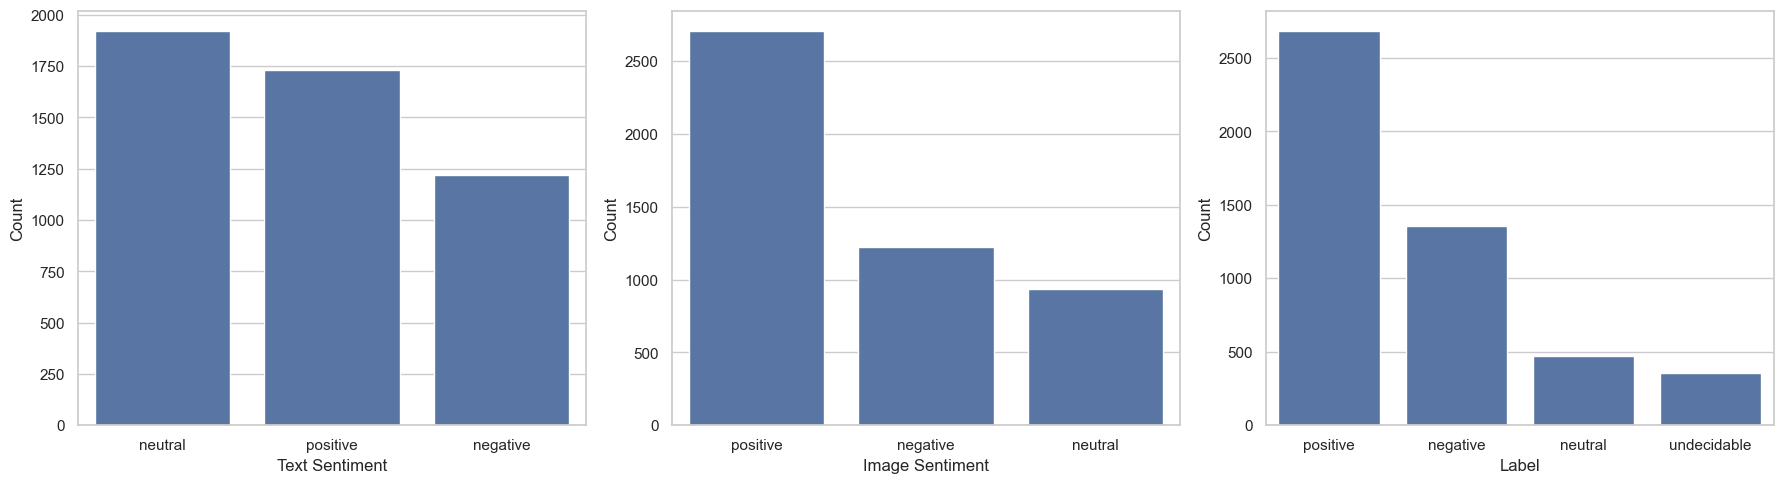

In [5]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='text', data=label, ax=axs[0], order=label['text'].value_counts().index)
axs[0].set_xlabel('Text Sentiment')
axs[0].set_ylabel('Count')

sns.countplot(x='image', data=label, ax=axs[1], order=label['image'].value_counts().index)
axs[1].set_xlabel('Image Sentiment')
axs[1].set_ylabel('Count')

sns.countplot(x='label', data=label, ax=axs[2], order=label['label'].value_counts().index)
axs[2].set_xlabel('Label')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.savefig("sentiment_counts.png", dpi=300)
plt.show()

In [8]:
label.to_csv('label.csv', index=False)

# Baseline - CNN
We then use CNN to do the unimodel sentiment analysis as the baseline. We use a simple CNN network, which contains simple convolution layers and MLP with 102M parameters, and a complex network, with multiple convolution layers, maxpooling layers, batchnorm and dropout, with a total of 305K parameters. The network structure are as follows.

In [3]:
# class MyCNN(nn.Module):
#     def __init__(self):
#         super(MyCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

#         self.fc1 = nn.Linear(64 * 56 * 56, 512)
#         self.fc2 = nn.Linear(512, 3)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = F.relu(self.conv2(x))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(x.size(0), -1)
#         x = self.fc1(x)
#         features = F.relu(x)
#         x = self.fc2(features)
#         return x, features
    
    
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x)
        features = F.relu(x)
        x = self.fc2(features)
        return x, features

We then do the preprocessing on the image, doing the random horizontal flip to improve the generalization ability. Also, we change the brightness and contrast to make sure that the model can identify different images clearly. Then we change the image into the Tensor.

In [4]:
model = MyCNN()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

In [5]:
df = pd.read_csv("label.csv")
df['ID'] = df['ID'].astype(str)
df

,ID,text,image,label,class,image_class
0,1,neutral,positive,positive,2,2
1,2,neutral,positive,positive,2,2
2,3,neutral,positive,positive,2,2
3,4,positive,positive,positive,2,2
4,5,positive,positive,positive,2,2
...,...,...,...,...,...,...
4864,5125,neutral,positive,positive,2,2
4865,5126,positive,neutral,positive,2,1
4866,5127,positive,positive,positive,2,2
4867,5128,neutral,positive,positive,2,2


In [51]:
label2idx = {label: idx for idx, label in enumerate(df['image'].unique())}
label2idx

{'positive': 0, 'negative': 1, 'neutral': 2}

We make the label, id, and image into a dataset structure and create our own dataset. We divide the train dataset, validation dataset and test dataset into 7:1.5:1.5. We set Batchsize as 32 and get the dataloader for the three datasets.

In [6]:
class MyImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_id = str(row['ID'])
        img_path = os.path.join(self.image_dir, f"{img_id}.jpg")
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = row['image_class']
        return image, label,img_id

In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

n_total = len(df)
n_val = int(n_total * 0.15)
n_test = int(n_total * 0.15)
n_train = n_total - n_val - n_test
dataset = MyImageDataset(df, image_dir="./image", transform=transform)
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
)
train_dataset = MyImageDataset(train_df, image_dir="./image", transform=transform)
val_dataset = MyImageDataset(val_df, image_dir="./image", transform=transform)
test_dataset = MyImageDataset(test_df, image_dir="./image", transform=transform)

In [8]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

We then use cuda to train the model using cross entrophy loss on train dataset and check the accuracy on validation dataset. We save the model parameters with the highest validation accuracy as the best model. After several epochs we save the parameters of the best model and do the evaluation. We use accuracy, precision and recall to evaluate the performance of the model. From the results we can see that the simple CNN easily causes overfitting, with a rapid increase on train-dataset and no increase on validation test, and the precision on test dataset is extremely low, indicating low performance on predicting. The complex one has a comparatively higher precision, indicating its ability of generalization.

In [9]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = MyCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-3)

best_val_acc = 0.0
best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(20): 
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for images, labels,_ in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs, _ = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels,_ in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_acc = correct / total
    print(f"Epoch {epoch+1}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())

model.load_state_dict(best_model_wts)

cuda
Epoch 1, Train Acc: 0.5449, Val Acc: 0.5616
Epoch 2, Train Acc: 0.5525, Val Acc: 0.5616
Epoch 3, Train Acc: 0.5519, Val Acc: 0.5616
Epoch 4, Train Acc: 0.5543, Val Acc: 0.5630
Epoch 5, Train Acc: 0.5552, Val Acc: 0.5644
Epoch 6, Train Acc: 0.5543, Val Acc: 0.5616
Epoch 7, Train Acc: 0.5531, Val Acc: 0.5616
Epoch 8, Train Acc: 0.5540, Val Acc: 0.5616
Epoch 9, Train Acc: 0.5531, Val Acc: 0.5616
Epoch 10, Train Acc: 0.5537, Val Acc: 0.5630
Epoch 11, Train Acc: 0.5531, Val Acc: 0.5616
Epoch 12, Train Acc: 0.5543, Val Acc: 0.5616
Epoch 13, Train Acc: 0.5540, Val Acc: 0.5616
Epoch 14, Train Acc: 0.5534, Val Acc: 0.5616
Epoch 15, Train Acc: 0.5525, Val Acc: 0.5616
Epoch 16, Train Acc: 0.5531, Val Acc: 0.5616
Epoch 17, Train Acc: 0.5558, Val Acc: 0.5507
Epoch 18, Train Acc: 0.5549, Val Acc: 0.5616
Epoch 19, Train Acc: 0.5572, Val Acc: 0.5685
Epoch 20, Train Acc: 0.5555, Val Acc: 0.5616


<All keys matched successfully>

In [36]:
torch.save(best_model_wts, 'CNN2_best_model.pth')

In [10]:
model.load_state_dict(torch.load('CNN2_best_model.pth'))
model.eval()

MyCNN(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(64, 128, k

In [13]:

all_labels = []
all_preds = []
all_ids = []
with torch.no_grad():
    for images, labels,img_ids in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs, _ = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_ids.extend(img_ids)


acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 0.5732
Precision: 0.5453
Recall   : 0.3659


In [105]:
df_out = pd.DataFrame({'ID': all_ids, 'image_pred': all_preds})
df_out.to_csv('image_pred_cnn.csv', index=False)